In [1]:
%matplotlib inline


# NCL_conOncon_5.py
This script illustrates the following concepts:
   - Overlaying individual contour lines on a polar stereographic map
   - Drawing a spaghetti contour plot
   - Increasing the thickness of contour lines
   - Explicitly setting contour levels
   - Changing the color of a contour line

See following URLs to see the reproduced NCL plot & script:
   - [Original NCL script](https://www.ncl.ucar.edu/Applications/Scripts/conOncon_5.ncl)
   - [Original NCL plot](https://www.ncl.ucar.edu/Applications/Images/conOncon_5_lg.png)


### Import packages:



In [2]:
import numpy as np
import xarray as xr
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

import geocat.datafiles as gdf
import geocat.viz as gv

### Read in data:



In [3]:
# Open a netCDF data file using xarray default engine and
# load the data into xarrays
ds = xr.open_dataset(gdf.get("netcdf_files/HGT500_MON_1958-1997.nc"),
                     decode_times=False)

### Plot:



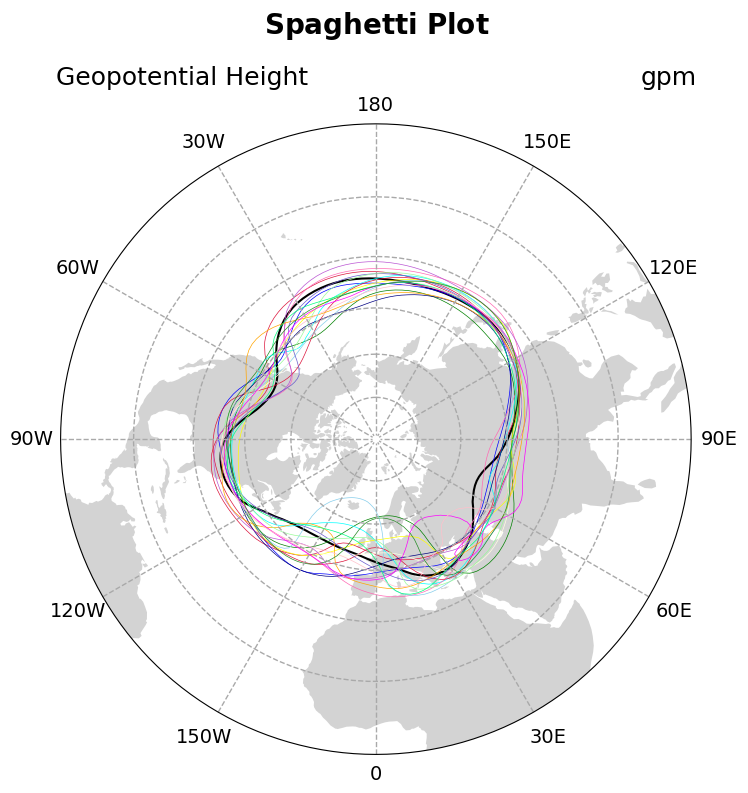

In [4]:
# Generate a figure
fig = plt.figure(figsize=(8, 8))

# Create an axis with a polar stereographic projection
ax = plt.axes(projection=ccrs.NorthPolarStereo())

# Add land feature to map
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Set map boundary to include latitudes between 0 and 40 and longitudes
# between -180 and 180 only
gv.set_map_boundary(ax, [-180, 180], [0, 40], south_pad=1)

# Set draw_labels to False so that you can manually manipulate it later
gl = ax.gridlines(ccrs.PlateCarree(),
                  draw_labels=False,
                  linestyle="--",
                  linewidth=1,
                  color='darkgray',
                  zorder=2)

# Manipulate latitude and longitude gridline numbers and spacing
gl.ylocator = mticker.FixedLocator(np.arange(0, 90, 15))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))

# Manipulate longitude labels (0, 30 E, 60 E, ..., 30 W, etc.)
ticks = np.arange(0, 210, 30)
etick = ['0'] + [
    r'%dE' % tick for tick in ticks if (tick != 0) & (tick != 180)
] + ['180']
wtick = [r'%dW' % tick for tick in ticks if (tick != 0) & (tick != 180)]
labels = etick + wtick
xticks = np.arange(0, 360, 30)
yticks = np.full_like(xticks, -5)  # Latitude where the labels will be drawn
for xtick, ytick, label in zip(xticks, yticks, labels):
    if label == '180':
        ax.text(xtick,
                ytick,
                label,
                fontsize=14,
                horizontalalignment='center',
                verticalalignment='top',
                transform=ccrs.Geodetic())
    elif label == '0':
        ax.text(xtick,
                ytick,
                label,
                fontsize=14,
                horizontalalignment='center',
                verticalalignment='bottom',
                transform=ccrs.Geodetic())
    else:
        ax.text(xtick,
                ytick,
                label,
                fontsize=14,
                horizontalalignment='center',
                verticalalignment='center',
                transform=ccrs.Geodetic())

# Get slice of data at the 0th timestep - plot this contour line separately
# because it will be thicker than the other contour lines
p = ds.HGT.isel(time=0)

# Use geocat-viz utility function to handle the no-shown-data
# artifact of 0 and 360-degree longitudes
slon = gv.xr_add_cyclic_longitudes(p, "lon")

# Plot contour data at pressure level 5500 at the first timestep
p = slon.plot.contour(ax=ax,
                      transform=ccrs.PlateCarree(),
                      linewidths=1.5,
                      levels=[5500],
                      colors='black',
                      add_labels=False)

# Create a color list for each of the next 18 contours
colorlist = [
    "crimson", "green", "blue", "yellow", "cyan", "hotpink", "crimson",
    "skyblue", "navy", "lightyellow", "mediumorchid", "orange", "slateblue",
    "palegreen", "magenta", "springgreen", "pink", "forestgreen", "violet"
]

# Iterate through 18 different timesteps
for x in range(18):

    # Get a slice of data at the 12*x+1 timestep
    p = ds.HGT.isel(time=12 * x + 1)

    # Use geocat-viz utility function to handle the no-shown-data artifact
    # of 0 and 360-degree longitudes
    slon = gv.xr_add_cyclic_longitudes(p, "lon")

    # Plot contour data at pressure level 5500 for the 12*x+1 timestep
    p = slon.plot.contour(ax=ax,
                          transform=ccrs.PlateCarree(),
                          linewidths=0.5,
                          levels=[5500],
                          colors=colorlist[x],
                          add_labels=False)

# Use geocat.viz.util convenience function to add titles
gv.set_titles_and_labels(ax,
                         maintitle=r"$\bf{Spaghetti}$" + " " + r"$\bf{Plot}$",
                         lefttitle=slon.long_name,
                         righttitle=slon.units)

# Make tight layout
plt.tight_layout()

# Show the plot
plt.show()